## Logistic Regression

- Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
- Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, **it gives the probabilistic values which lie between 0 and 1.**
- Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas **Logistic regression is used for solving the classification problems**.
- In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).- The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.n:

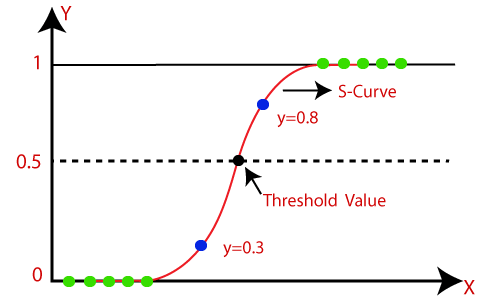

**Note**: Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

## Logistic Function (Sigmoid Function):

- The sigmoid function is a mathematical function used to map the predicted values to probabilities.
- It maps any real value into another value within a range of 0 and 1.
- The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.
- In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

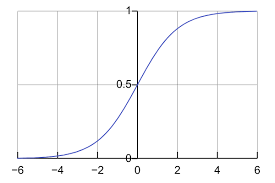

## Formula

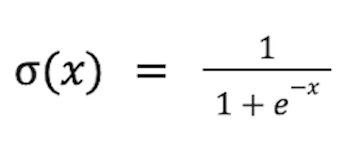

## Logistic Regression Equation:

The Logistic regression equation can be obtained from the Linear Regression equation. The mathematical steps to get Logistic Regression equations are given below:

- We know the equation of the straight line can be written as:

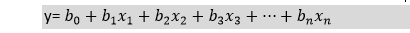

- In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):

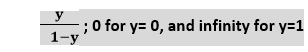

- But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:

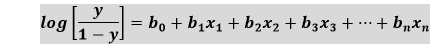

The above equation is the final equation for Logistic Regression.

## Types of Logistic Regression:

On the basis of the categories, Logistic Regression can be classified into three types:

- **Binomial**: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.
  
- **Multinomial**: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
  
- **Ordinal**: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

## Implementation

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

### 1. Collecting Data

In [22]:
titanic_data = pd.read_csv(r"C:\Users\devad\Downloads\titanic.csv")

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
print(" # of passengers in original data:" + str(len(titanic_data.index)))

 # of passengers in original data:891


### 2. Analyzing Data

<Axes: xlabel='Survived', ylabel='count'>

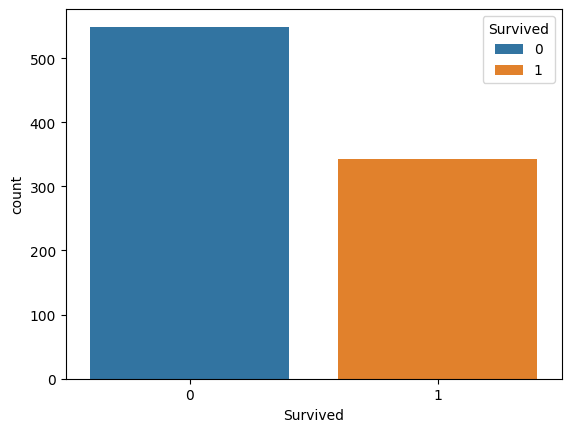

In [25]:
sns.countplot(x="Survived",hue="Survived",data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

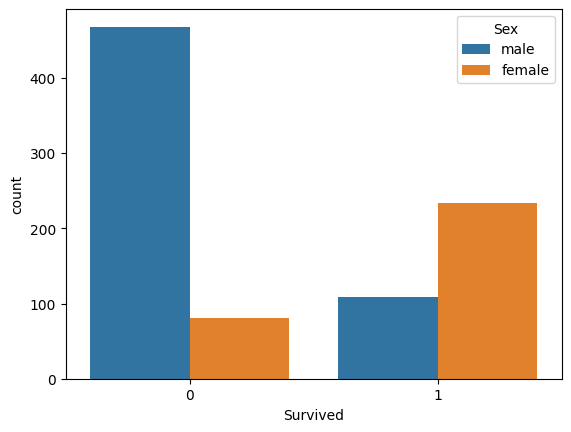

In [26]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

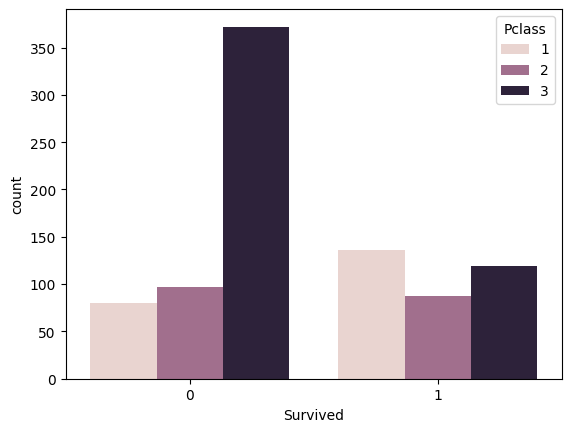

In [27]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<Axes: ylabel='Frequency'>

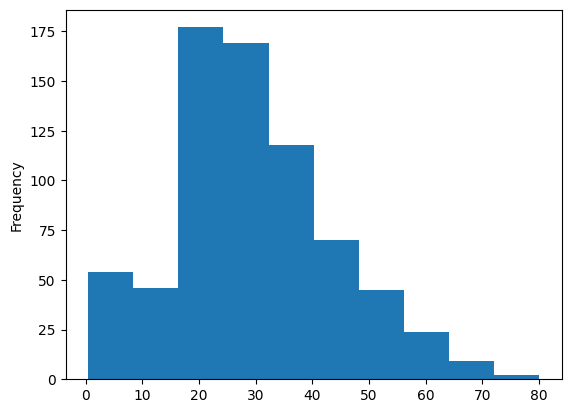

In [28]:
titanic_data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

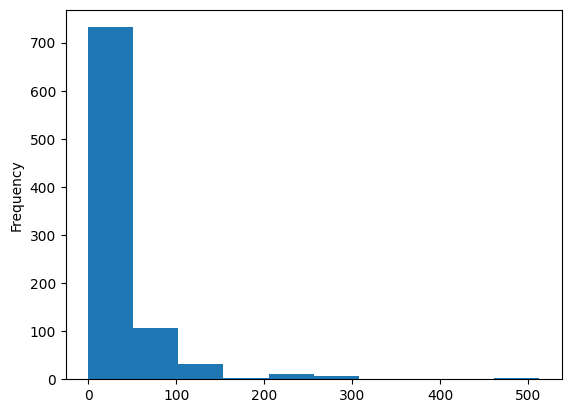

In [29]:
titanic_data['Fare'].plot.hist()

In [30]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

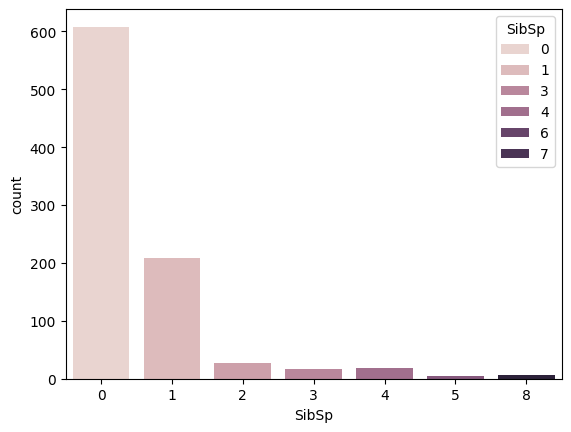

In [31]:
sns.countplot(x="SibSp",data=titanic_data,hue="SibSp")

### 3. Data Wrangling

In [32]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [35]:
titanic_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [36]:
titanic_data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [37]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Age'].median()

np.float64(28.0)

In [39]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [42]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('B98')

In [45]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
titanic_data['Pclass'].value_counts()   

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
ml = LabelEncoder()
titanic_data['Pclass']=ml.fit_transform(titanic_data['Pclass'])

In [50]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B98,S
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B98,S
887,888,1,0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B98,S
889,890,1,0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [52]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B98,False,True
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,False,True
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B98,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B98,False,True
887,888,1,0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,False,True
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B98,False,True
889,890,1,0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,False,False


In [53]:
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [54]:
# Convert boolean columns to integers
for col in titanic_data.filter(like='Embarked').columns:
    titanic_data[col] = titanic_data[col].astype(int)

In [55]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B98,0,1
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,0,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B98,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B98,0,1
887,888,1,0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B98,0,1
889,890,1,0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0


In [56]:
from sklearn.preprocessing import LabelEncoder
ml = LabelEncoder()
titanic_data['Sex']=ml.fit_transform(titanic_data['Sex'])

In [57]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B98,0,1
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B98,0,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B98,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,B98,0,1
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,B98,0,1
889,890,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,0


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Name'] = label_encoder.fit_transform(titanic_data['Name'])

In [59]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,108,1,22.0,1,0,A/5 21171,7.2500,B98,0,1
1,2,1,0,190,0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,2,353,0,26.0,0,0,STON/O2. 3101282,7.9250,B98,0,1
3,4,1,0,272,0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,2,15,1,35.0,0,0,373450,8.0500,B98,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,548,1,27.0,0,0,211536,13.0000,B98,0,1
887,888,1,0,303,0,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,2,413,0,28.0,1,2,W./C. 6607,23.4500,B98,0,1
889,890,1,0,81,1,26.0,0,0,111369,30.0000,C148,0,0


In [60]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 90.6+ KB


In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Ticket'] = label_encoder.fit_transform(titanic_data['Ticket'])

In [62]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,108,1,22.0,1,0,523,7.2500,B98,0,1
1,2,1,0,190,0,38.0,1,0,596,71.2833,C85,0,0
2,3,1,2,353,0,26.0,0,0,669,7.9250,B98,0,1
3,4,1,0,272,0,35.0,1,0,49,53.1000,C123,0,1
4,5,0,2,15,1,35.0,0,0,472,8.0500,B98,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,548,1,27.0,0,0,101,13.0000,B98,0,1
887,888,1,0,303,0,19.0,0,0,14,30.0000,B42,0,1
888,889,0,2,413,0,28.0,1,2,675,23.4500,B98,0,1
889,890,1,0,81,1,26.0,0,0,8,30.0000,C148,0,0


In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Cabin'] = label_encoder.fit_transform(titanic_data['Cabin'])

In [64]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,108,1,22.0,1,0,523,7.2500,48,0,1
1,2,1,0,190,0,38.0,1,0,596,71.2833,82,0,0
2,3,1,2,353,0,26.0,0,0,669,7.9250,48,0,1
3,4,1,0,272,0,35.0,1,0,49,53.1000,56,0,1
4,5,0,2,15,1,35.0,0,0,472,8.0500,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,548,1,27.0,0,0,101,13.0000,48,0,1
887,888,1,0,303,0,19.0,0,0,14,30.0000,30,0,1
888,889,0,2,413,0,28.0,1,2,675,23.4500,48,0,1
889,890,1,0,81,1,26.0,0,0,8,30.0000,61,0,0


In [65]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [66]:
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [67]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,108,1,22,1,0,523,7.2500,48,0,1
1,2,1,0,190,0,38,1,0,596,71.2833,82,0,0
2,3,1,2,353,0,26,0,0,669,7.9250,48,0,1
3,4,1,0,272,0,35,1,0,49,53.1000,56,0,1
4,5,0,2,15,1,35,0,0,472,8.0500,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,548,1,27,0,0,101,13.0000,48,0,1
887,888,1,0,303,0,19,0,0,14,30.0000,30,0,1
888,889,0,2,413,0,28,1,2,675,23.4500,48,0,1
889,890,1,0,81,1,26,0,0,8,30.0000,61,0,0


In [68]:
titanic_data['Fare'] = titanic_data['Fare'].astype(int)

In [69]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,2,108,1,22,1,0,523,7,48,0,1
1,2,1,0,190,0,38,1,0,596,71,82,0,0
2,3,1,2,353,0,26,0,0,669,7,48,0,1
3,4,1,0,272,0,35,1,0,49,53,56,0,1
4,5,0,2,15,1,35,0,0,472,8,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,548,1,27,0,0,101,13,48,0,1
887,888,1,0,303,0,19,0,0,14,30,30,0,1
888,889,0,2,413,0,28,1,2,675,23,48,0,1
889,890,1,0,81,1,26,0,0,8,30,61,0,0


In [70]:
x = titanic_data.drop("Survived", axis=1)

In [71]:
y = titanic_data["Survived"]

In [72]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,2,108,1,22,1,0,523,7,48,0,1
1,2,0,190,0,38,1,0,596,71,82,0,0
2,3,2,353,0,26,0,0,669,7,48,0,1
3,4,0,272,0,35,1,0,49,53,56,0,1
4,5,2,15,1,35,0,0,472,8,48,0,1


In [73]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)


LogisticRegression()

In [139]:
x_test_scaled = scaler.transform(x_test)

predictions = log_model.predict(x_test_scaled)

print(predictions)


[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1]


In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
confusion_matrix(y_test, predictions)

array([[43,  8],
       [ 9, 30]])

In [142]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)*100
print("Model accuracy:", accuracy)

Model accuracy: 81.11111111111111
